<a href="https://colab.research.google.com/github/mahekbagde/ML/blob/main/Pract1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 1
Aim : Implementation of supervised learning algorithms from scratch

Problem Definition : Download a labeled dataset (.csv) and implement the different supervised learning algorithms, like Decision Tree, K-NN, Naive Bayes. Understand the methodologies, implementation details, and libraries of each of the learning algorithms. Compare the performance of each algorithm for the given dataset.


# 1.Decision Trees

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# For finding performance, accuracy, report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [17]:
# Function importing Dataset
def importdata():
    maternal_data = pd.read_csv("/Maternal Health Risk Data Set.csv",
    sep= ',', header = None)

    # Printing the dataset shape
    print ("Dataset Length: ", len(maternal_data))
    print ("Dataset Shape: ", maternal_data.shape)

    # Printing the dataset obseravtions
    print ("Dataset: ",maternal_data.head())
    return maternal_data

In [3]:
# Function to split the dataset
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[1:, 0:6]
    Y = balance_data.values[1:, 6]

    # Splitting the dataset into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2)

    return X, Y, X_train, X_test, Y_train, Y_test

In [4]:
def standardscaler(X_train, X_test):
    # Preprocessing data
    from sklearn.preprocessing import StandardScaler
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [5]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, Y_train, data):
        # Creating the classifier object
        clf_gini = DecisionTreeClassifier(criterion = "gini",max_depth=3)

        # Performing training
        clf_gini.fit(X_train, Y_train)
        plt.figure(figsize=(20,15))
        tree.plot_tree(clf_gini, feature_names=data.iloc[0], filled=True)
        return clf_gini

In [6]:
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, Y_train, data):

        # Decision tree with entropy
        clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

        # Performing training
        clf_entropy.fit(X_train, Y_train)
        plt.figure(figsize=(20,15))
        tree.plot_tree(clf_entropy, feature_names=data.iloc[0], filled=True)
        return clf_entropy

In [7]:
# Function to make predictions
def prediction(X_test, clf_object):

    # Predicton on test with giniIndex
    Y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(Y_pred)
    return Y_pred

In [8]:
# Function to calculate accuracy
def cal_accuracy(y_test, Y_pred):

    print("Confusion Matrix: ",confusion_matrix(y_test, Y_pred))

    print ("Accuracy: ",accuracy_score(y_test,Y_pred)*100)

    print("Report: ",classification_report(y_test, Y_pred))

In [12]:
# Driver code
def main():

    # Building Phase
    data= importdata()
    X, Y, X_train, X_test, Y_train, Y_test = splitdataset(data)
    X_train, X_test = standardscaler(X_train, X_test)
    clf_gini = train_using_gini(X_train, X_test, Y_train, data)
    clf_entropy = train_using_entropy(X_train, X_test, Y_train, data)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(Y_test, y_pred_gini)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(Y_test, y_pred_entropy)

Dataset Length:  1015
Dataset Shape:  (1015, 7)
Dataset:       0           1            2   3         4          5          6
0  Age  SystolicBP  DiastolicBP  BS  BodyTemp  HeartRate  RiskLevel
1   25         130           80  15        98         86  high risk
2   35         140           90  13        98         70  high risk
3   29          90           70   8       100         80  high risk
4   30         140           85   7        98         70  high risk
Results Using Gini Index:
Predicted values:
['low risk' 'high risk' 'low risk' 'mid risk' 'low risk' 'high risk'
 'low risk' 'high risk' 'low risk' 'high risk' 'low risk' 'low risk'
 'high risk' 'low risk' 'high risk' 'high risk' 'low risk' 'low risk'
 'high risk' 'low risk' 'low risk' 'low risk' 'low risk' 'high risk'
 'low risk' 'high risk' 'low risk' 'high risk' 'high risk' 'high risk'
 'low risk' 'low risk' 'high risk' 'high risk' 'mid risk' 'mid risk'
 'low risk' 'high risk' 'low risk' 'high risk' 'high risk' 'high risk'
 '

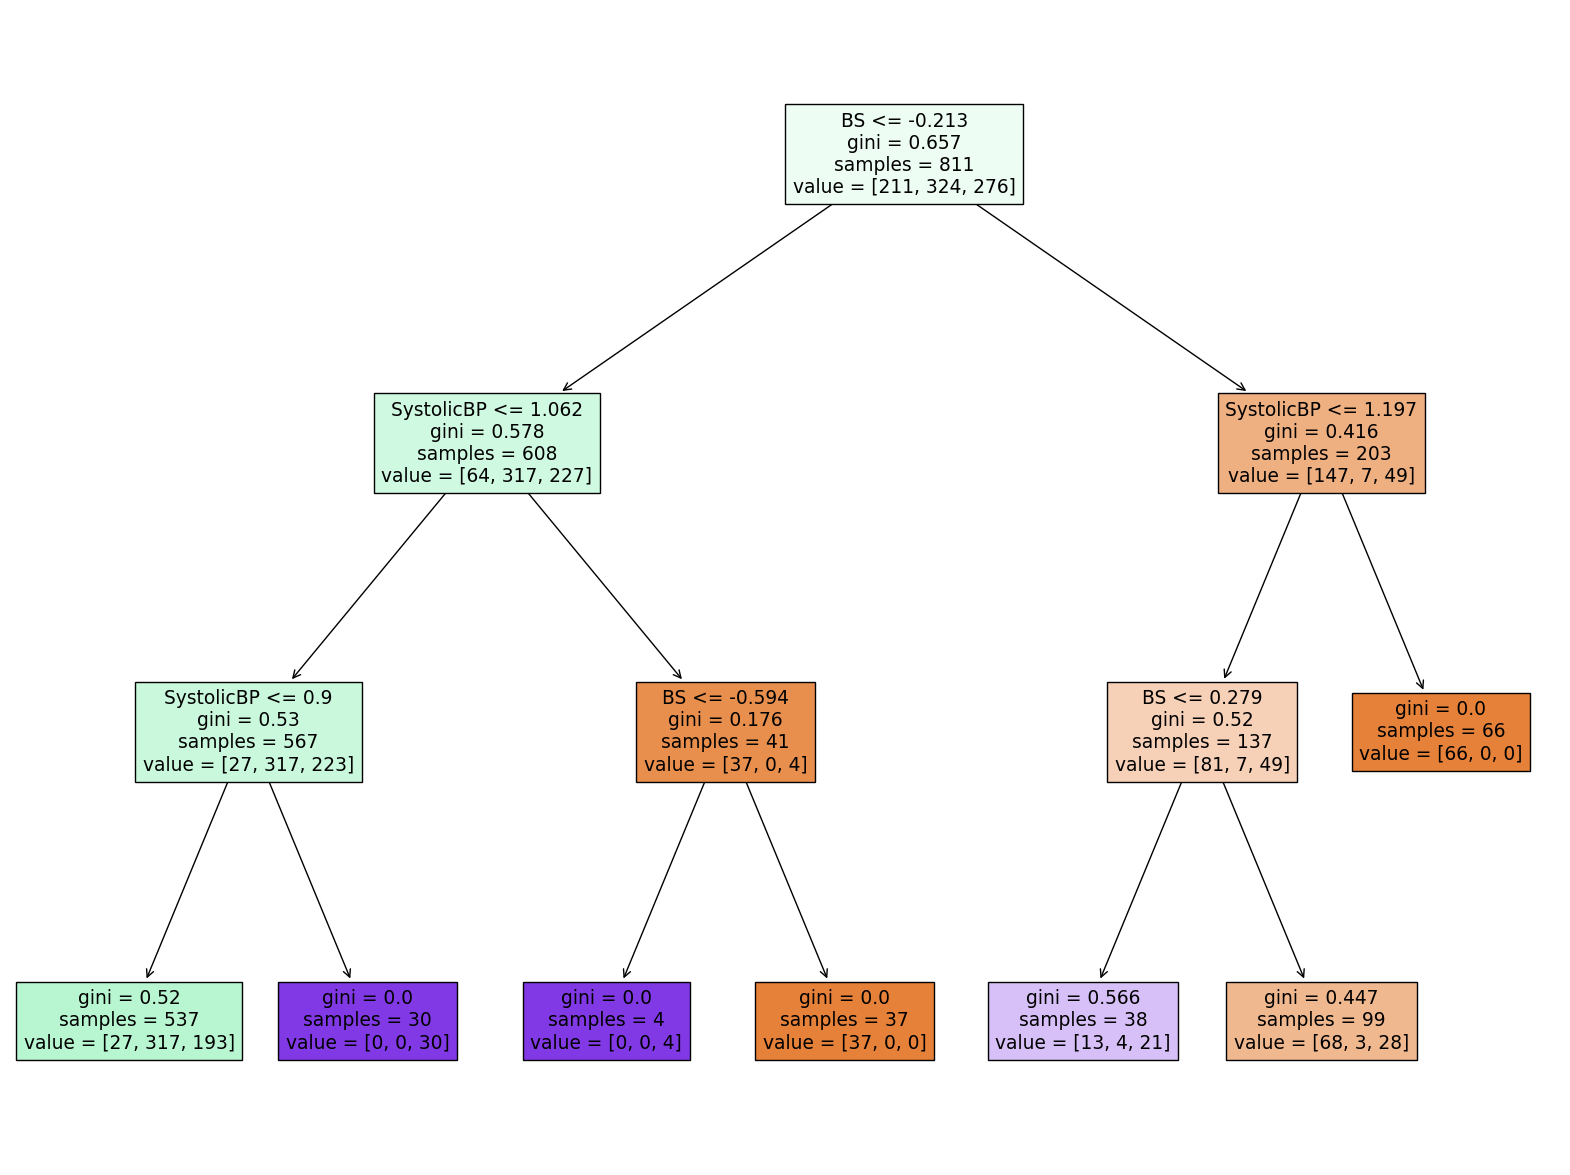

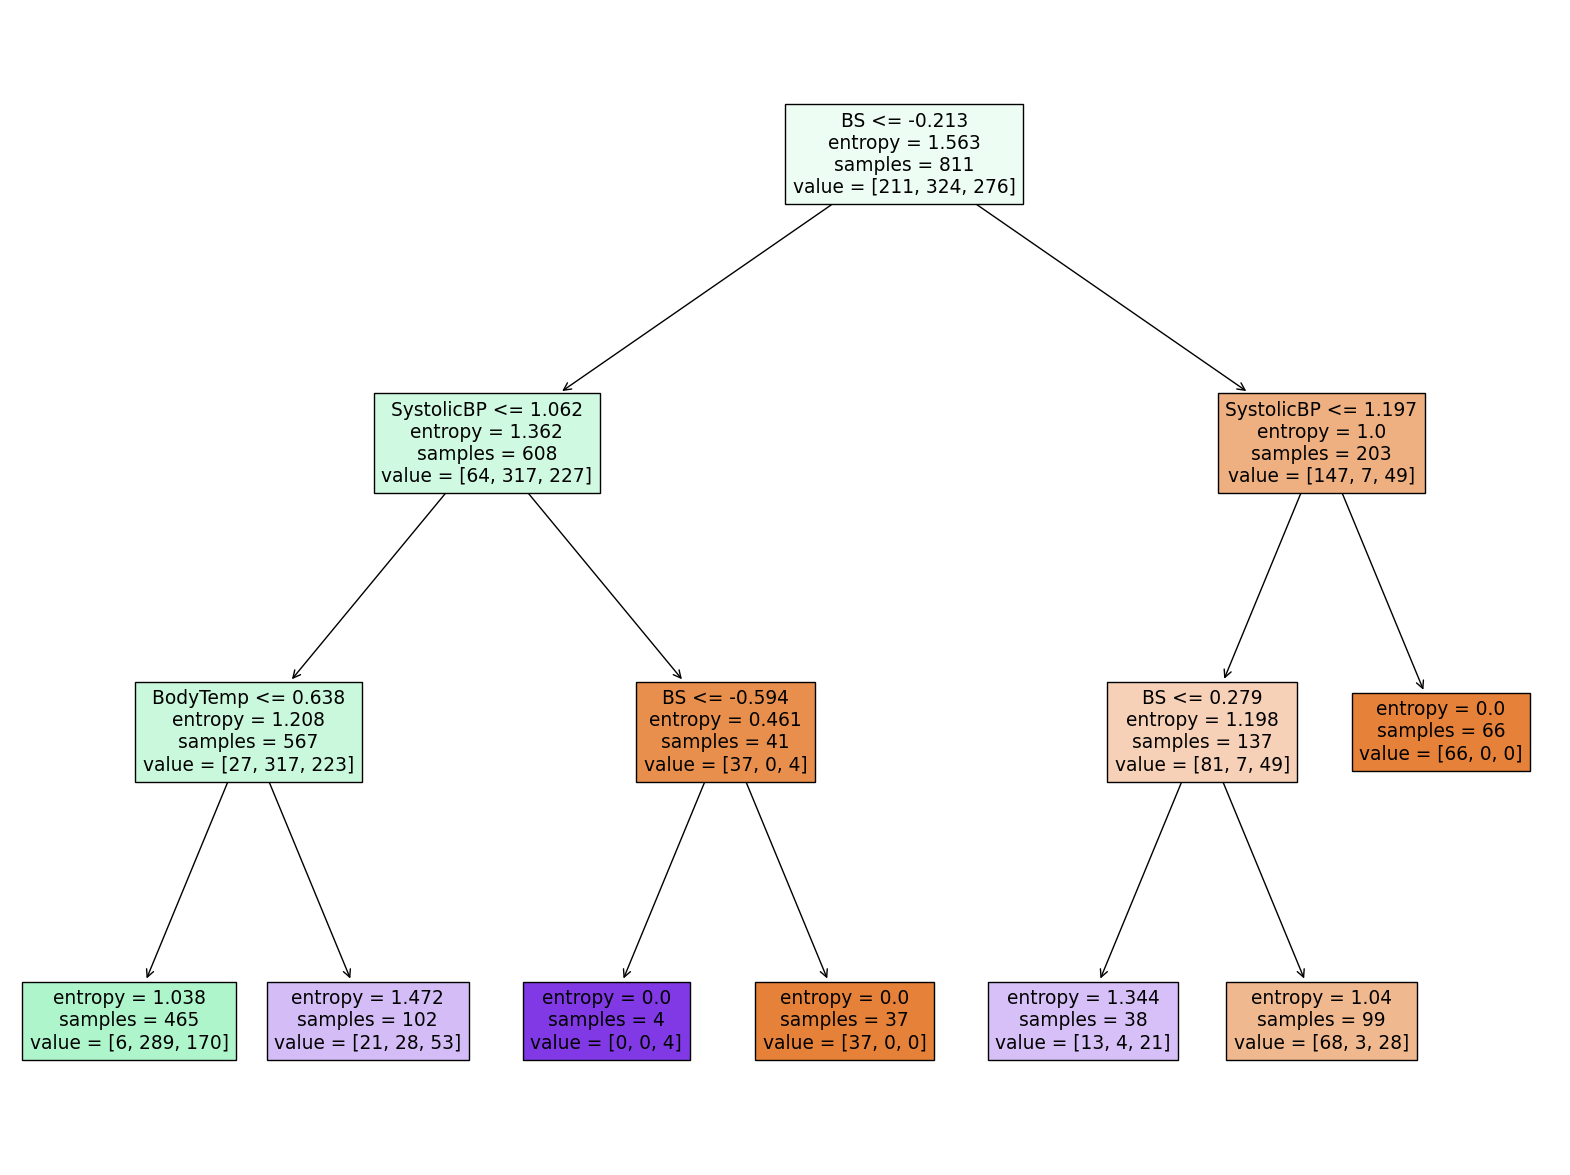

In [18]:
# Calling main function
if __name__=="__main__":
    main()

# 2. K-NN

In [20]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [21]:
# Load the dataset using your importdata function
maternal_data = importdata()

Dataset Length:  1015
Dataset Shape:  (1015, 7)
Dataset:       0           1            2   3         4          5          6
0  Age  SystolicBP  DiastolicBP  BS  BodyTemp  HeartRate  RiskLevel
1   25         130           80  15        98         86  high risk
2   35         140           90  13        98         70  high risk
3   29          90           70   8       100         80  high risk
4   30         140           85   7        98         70  high risk


In [23]:
#Splitting the data
X, Y, X_train, X_test, Y_train, Y_test = splitdataset(maternal_data)

In [24]:
# Scale the features using StandardScaler
X_train, X_test = standardscaler(X_train, X_test)

In [25]:
# Scale the features using StandardScaler
X_train, X_test = standardscaler(X_train, X_test)

# Define a range of k values to test
k_values = list(range(1, 31))
scores = []

for k in k_values:
    # Create a k-NN classifier for the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation and calculate the mean score
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

In [26]:
# Find the best k value based on cross-validation scores
best_k = k_values[np.argmax(scores)]

# Create a k-NN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# Make predictions on the test data
y_pred = best_knn.predict(X_test)

Predicted labels for test data: ['low risk' 'low risk' 'mid risk' 'low risk' 'mid risk' 'low risk'
 'high risk' 'mid risk' 'high risk' 'mid risk' 'high risk' 'mid risk'
 'mid risk' 'low risk' 'mid risk' 'mid risk' 'low risk' 'low risk'
 'low risk' 'mid risk' 'mid risk' 'low risk' 'mid risk' 'mid risk'
 'low risk' 'high risk' 'mid risk' 'low risk' 'mid risk' 'mid risk'
 'low risk' 'low risk' 'high risk' 'mid risk' 'high risk' 'mid risk'
 'high risk' 'mid risk' 'mid risk' 'low risk' 'mid risk' 'mid risk'
 'high risk' 'high risk' 'low risk' 'mid risk' 'low risk' 'low risk'
 'high risk' 'mid risk' 'low risk' 'mid risk' 'mid risk' 'mid risk'
 'low risk' 'low risk' 'low risk' 'mid risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'mid risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'mid risk' 'high risk' 'low risk'
 'mid risk' 'low risk' 'high risk' 'high risk' 'mid risk' 'low risk'
 'low risk' 'low risk' 'mid risk' 'mid risk' 'low risk' 'mid risk'
 'mid risk' 'l

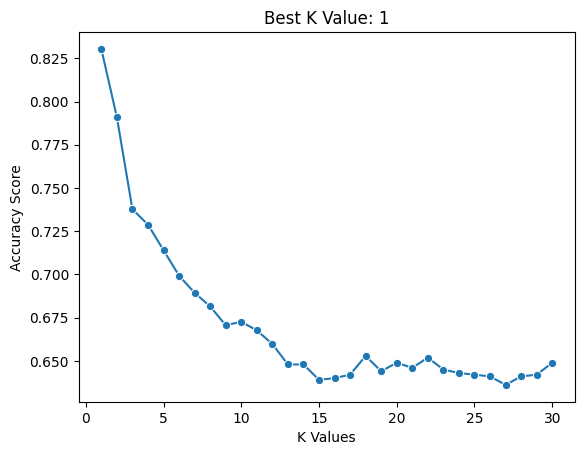

In [28]:
# Visualize the accuracy scores for different k values
sb.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title(f"Best K Value: {best_k}")

# Evaluate the classifier's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

print("Predicted labels for test data:", y_pred)
print(f"Best K Value: {best_k}")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

plt.show()  # Display the accuracy vs k plot

In [29]:
# Evaluate the classifier's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

print("Predicted labels for test data:", y_pred)
print("Accuracy:", (accuracy)*100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Predicted labels for test data: ['low risk' 'low risk' 'mid risk' 'low risk' 'mid risk' 'low risk'
 'high risk' 'mid risk' 'high risk' 'mid risk' 'high risk' 'mid risk'
 'mid risk' 'low risk' 'mid risk' 'mid risk' 'low risk' 'low risk'
 'low risk' 'mid risk' 'mid risk' 'low risk' 'mid risk' 'mid risk'
 'low risk' 'high risk' 'mid risk' 'low risk' 'mid risk' 'mid risk'
 'low risk' 'low risk' 'high risk' 'mid risk' 'high risk' 'mid risk'
 'high risk' 'mid risk' 'mid risk' 'low risk' 'mid risk' 'mid risk'
 'high risk' 'high risk' 'low risk' 'mid risk' 'low risk' 'low risk'
 'high risk' 'mid risk' 'low risk' 'mid risk' 'mid risk' 'mid risk'
 'low risk' 'low risk' 'low risk' 'mid risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'mid risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'mid risk' 'high risk' 'low risk'
 'mid risk' 'low risk' 'high risk' 'high risk' 'mid risk' 'low risk'
 'low risk' 'low risk' 'mid risk' 'mid risk' 'low risk' 'mid risk'
 'mid risk' 'l

# 3.Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
data = importdata()

Dataset Length:  1015
Dataset Shape:  (1015, 7)
Dataset:       0           1            2   3         4          5          6
0  Age  SystolicBP  DiastolicBP  BS  BodyTemp  HeartRate  RiskLevel
1   25         130           80  15        98         86  high risk
2   35         140           90  13        98         70  high risk
3   29          90           70   8       100         80  high risk
4   30         140           85   7        98         70  high risk


In [33]:
from sklearn.model_selection import train_test_split

    # Splitting the dataset into train and test
X, Y, train, test, train_labels, test_labels = splitdataset(data)

In [39]:
# Model evaluation by using Naïve Bayes algorithm.
from sklearn.naive_bayes import GaussianNB

# Let's initializing the model:
NBclassifier = GaussianNB()

# Train the model:
NBmodel = NBclassifier.fit(train, train_labels)

# Making predictions by using pred() function:
NBpred = NBclassifier.predict(test)
print("The predictions are:\n", NBpred[:15])

The predictions are:
 ['low risk' 'low risk' 'low risk' 'mid risk' 'high risk' 'high risk'
 'low risk' 'low risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'mid risk' 'low risk' 'low risk']


In [40]:
# Finding accuracy of our Naive Bayes classifier:
from sklearn.metrics import accuracy_score
print("Accuracy of our classifier is:", accuracy_score(test_labels, NBpred) *100)

Accuracy of our classifier is: 59.60591133004927
